<a href="https://colab.research.google.com/github/Thusharkanth/DSGP/blob/main/DSGP_Data_preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#  Loading the dataset from google drive

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path
file_path = "/content/drive/MyDrive/DSGP/Generated_Import_Statistics_2023.xlsx"

# Load the Excel file
excel_data = pd.ExcelFile(file_path)

# Load data from all sheets and concatenate them into one DataFrame
all_data = pd.concat([excel_data.parse(sheet_name) for sheet_name in excel_data.sheet_names], ignore_index=True)

# Print all 10000 records from all sheets combined
print(f"Total records loaded: {len(all_data)}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total records loaded: 10000


In [47]:
# First 5 rows of the dataset
all_data.head()


,IMPORTER,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION_01,DESCRIPTION_02,DESCRIPTION_03
0,Redwood Chemical Co.,2023,JULY,280110,AUSTRIA,Kg.,11286,10096660,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.",Nitric acid; sulphonitric acids
1,Redwood Chemical Co.,2023,DECEMBER,283719,SPAIN,Kg.,79917,13619760,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.",Nitric acid; sulphonitric acids
2,Greenfield Enterprises,2023,MARCH,280110,GERMANY,Kg.,1741,38229987,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.",Chlorine
3,Prime Logistics Group,2023,NOVEMBER,280800,CHINA,Kg.,171400,16670229,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.",Nitric acid; sulphonitric acids
4,Redwood Chemical Co.,2023,MARCH,280800,SOUTH KOREA,Kg.,130590,25506754,Inorganic chemicals; Organic or inorganic comp...,"Hydrogen peroxide, whether or not solidified w...",Cyanides and cyanide oxides : Of sodium


In [48]:
# understand the dataset

print ('\n Dataset Information ')
all_data.info()

print ('\n Dataset Statistical Summary  ')
all_data.describe()



 Dataset Information 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IMPORTER        10000 non-null  object
 1   YEAR            10000 non-null  int64 
 2   MONTH           10000 non-null  object
 3   HSCODE          10000 non-null  int64 
 4   COUNTRY         10000 non-null  object
 5   UNIT            10000 non-null  object
 6   QUANTITY        10000 non-null  int64 
 7   VALUE_RS        10000 non-null  int64 
 8   DESCRIPTION_01  10000 non-null  object
 9   DESCRIPTION_02  10000 non-null  object
 10  DESCRIPTION_03  10000 non-null  object
dtypes: int64(4), object(7)
memory usage: 859.5+ KB

 Dataset Statistical Summary  


,YEAR,HSCODE,QUANTITY,VALUE_RS
count,10000.0,10000.000000,10000.000000,1.000000e+04
mean,2023.0,282614.092000,99473.210700,2.520635e+07
std,0.0,1810.162989,57156.755594,1.441738e+07
min,2023.0,280110.000000,1001.000000,1.017680e+05
25%,2023.0,280800.000000,50264.750000,1.276327e+07
50%,2023.0,283711.000000,98558.500000,2.527500e+07
75%,2023.0,283719.000000,148981.500000,3.774728e+07
max,2023.0,284700.000000,199975.000000,4.999840e+07


In [49]:
# handling miss values

# Replace "unkown" with NaN in all columns
all_data = all_data.replace("unkown", np.nan)

# understand the dataset, to identify any missing data in anyother form

for column in all_data.columns:
    unique_values = all_data[column].unique()
    print(f"\n Unique values in column \n'{column}': {unique_values}")

#print the number of missing values
print()
print(all_data.isnull().sum())

# since there is now missing values we can move on

# Droping these col because it has the same value kg and 2023
all_data = all_data.drop(['UNIT', 'YEAR'], axis=1)





 Unique values in column 
'IMPORTER': ['Redwood Chemical Co.' 'Greenfield Enterprises' 'Prime Logistics Group'
 'TransWorld Chemicals']

 Unique values in column 
'YEAR': [2023]

 Unique values in column 
'MONTH': ['JULY' 'DECEMBER' 'MARCH' 'NOVEMBER' 'AUGUST' 'OCTOBER' 'MAY' 'JUNE'
 'SEPTEMBER' 'FEBRUARY' 'APRIL' 'JANUARY']

 Unique values in column 
'HSCODE': [280110 283719 280800 283711 284700]

 Unique values in column 
'COUNTRY': ['AUSTRIA' 'SPAIN' 'GERMANY' 'CHINA' 'SOUTH KOREA' 'MALAYSIA' 'THAILAND'
 'PAKISTAN' 'SINGAPORE' 'DENMARK' 'U.S.A' 'INDIA' 'JAPAN' 'BANGLADESH'
 'FRANCE' 'U.K.']

 Unique values in column 
'UNIT': ['Kg.']

 Unique values in column 
'QUANTITY': [ 11286  79917   1741 ... 161189 171418  91712]

 Unique values in column 
'VALUE_RS': [10096660 13619760 38229987 ... 28993176 47974241 42892391]

 Unique values in column 
'DESCRIPTION_01': ['Inorganic chemicals; Organic or inorganic compounds of precious metals']

 Unique values in column 
'DESCRIPTION_02': ['Cy

In [50]:
# Get the list of numerical columns
numerical_cols = all_data.select_dtypes(include=np.number).columns.tolist()

# Get the list of categorical columns
categorical_cols = all_data.select_dtypes(exclude=np.number).columns.tolist()

# Print the results
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['HSCODE', 'QUANTITY', 'VALUE_RS']
Categorical Columns: ['IMPORTER', 'MONTH', 'COUNTRY', 'DESCRIPTION_01', 'DESCRIPTION_02', 'DESCRIPTION_03']


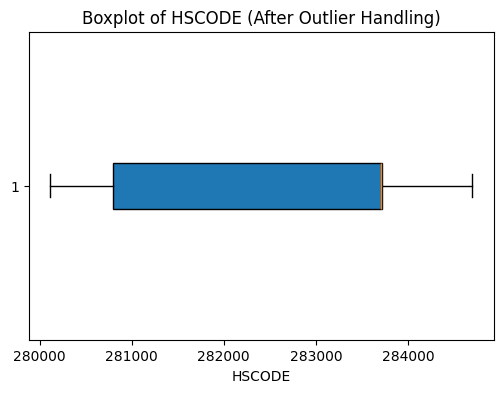

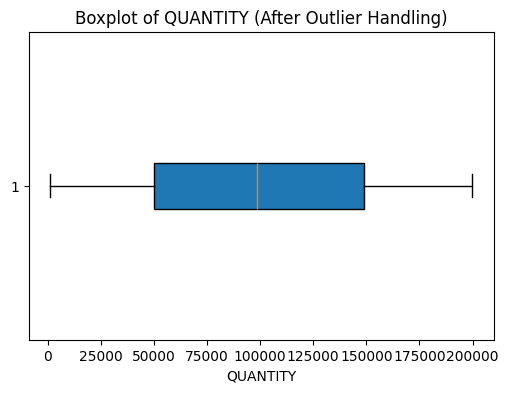

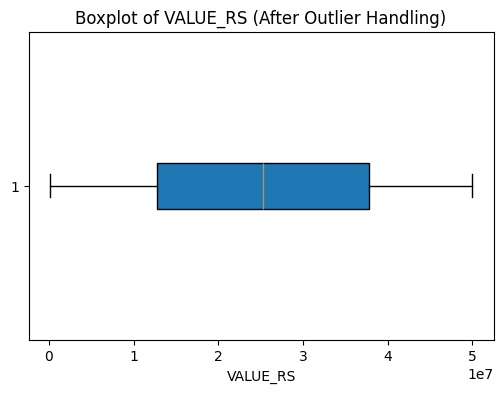

In [51]:
# handling Outlier

# Create box plots after outlier handling
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(all_data[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col} (After Outlier Handling)")
    plt.xlabel(col)
    plt.show()


for column in numerical_cols:
    Q1 = all_data[column].quantile(0.25)
    Q3 = all_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    median = all_data[column].median()
    all_data[column] = np.where((all_data[column] < lower_bound) | (all_data[column] > upper_bound), median, all_data[column])



In [52]:
# Encoding Categorical variables
# Perform one-hot encoding for categorical columns

all_data = pd.get_dummies(all_data, columns=categorical_cols, prefix=categorical_cols, prefix_sep='_', drop_first=True)

# Displaying the encoded data
print('\nEncoded data\n')
all_data.head()




Encoded data



,HSCODE,QUANTITY,VALUE_RS,IMPORTER_Prime Logistics Group,IMPORTER_Redwood Chemical Co.,IMPORTER_TransWorld Chemicals,MONTH_AUGUST,MONTH_DECEMBER,MONTH_FEBRUARY,MONTH_JANUARY,...,COUNTRY_SPAIN,COUNTRY_THAILAND,COUNTRY_U.K.,COUNTRY_U.S.A,"DESCRIPTION_02_Fluorine, chlorine, bromine and iodine","DESCRIPTION_02_Hydrogen peroxide, whether or not solidified with urea.",DESCRIPTION_02_Nitric acid; sulphonitric acids.,DESCRIPTION_03_Cyanides and cyanide oxides : Of sodium,"DESCRIPTION_03_Hydrogen peroxide, whether or not solidified with urea.",DESCRIPTION_03_Nitric acid; sulphonitric acids
0,280110.0,11286.0,10096660.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,283719.0,79917.0,13619760.0,False,True,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
2,280110.0,1741.0,38229987.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,280800.0,171400.0,16670229.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,280800.0,130590.0,25506754.0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [53]:
# normalize/ Standardize the numarial features

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your numerical data and transform it
all_data[numerical_cols] = scaler.fit_transform(all_data[numerical_cols])
